In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### (b) Pre-Processing and Exploratory data analysis:

#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

/Users/erichuang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


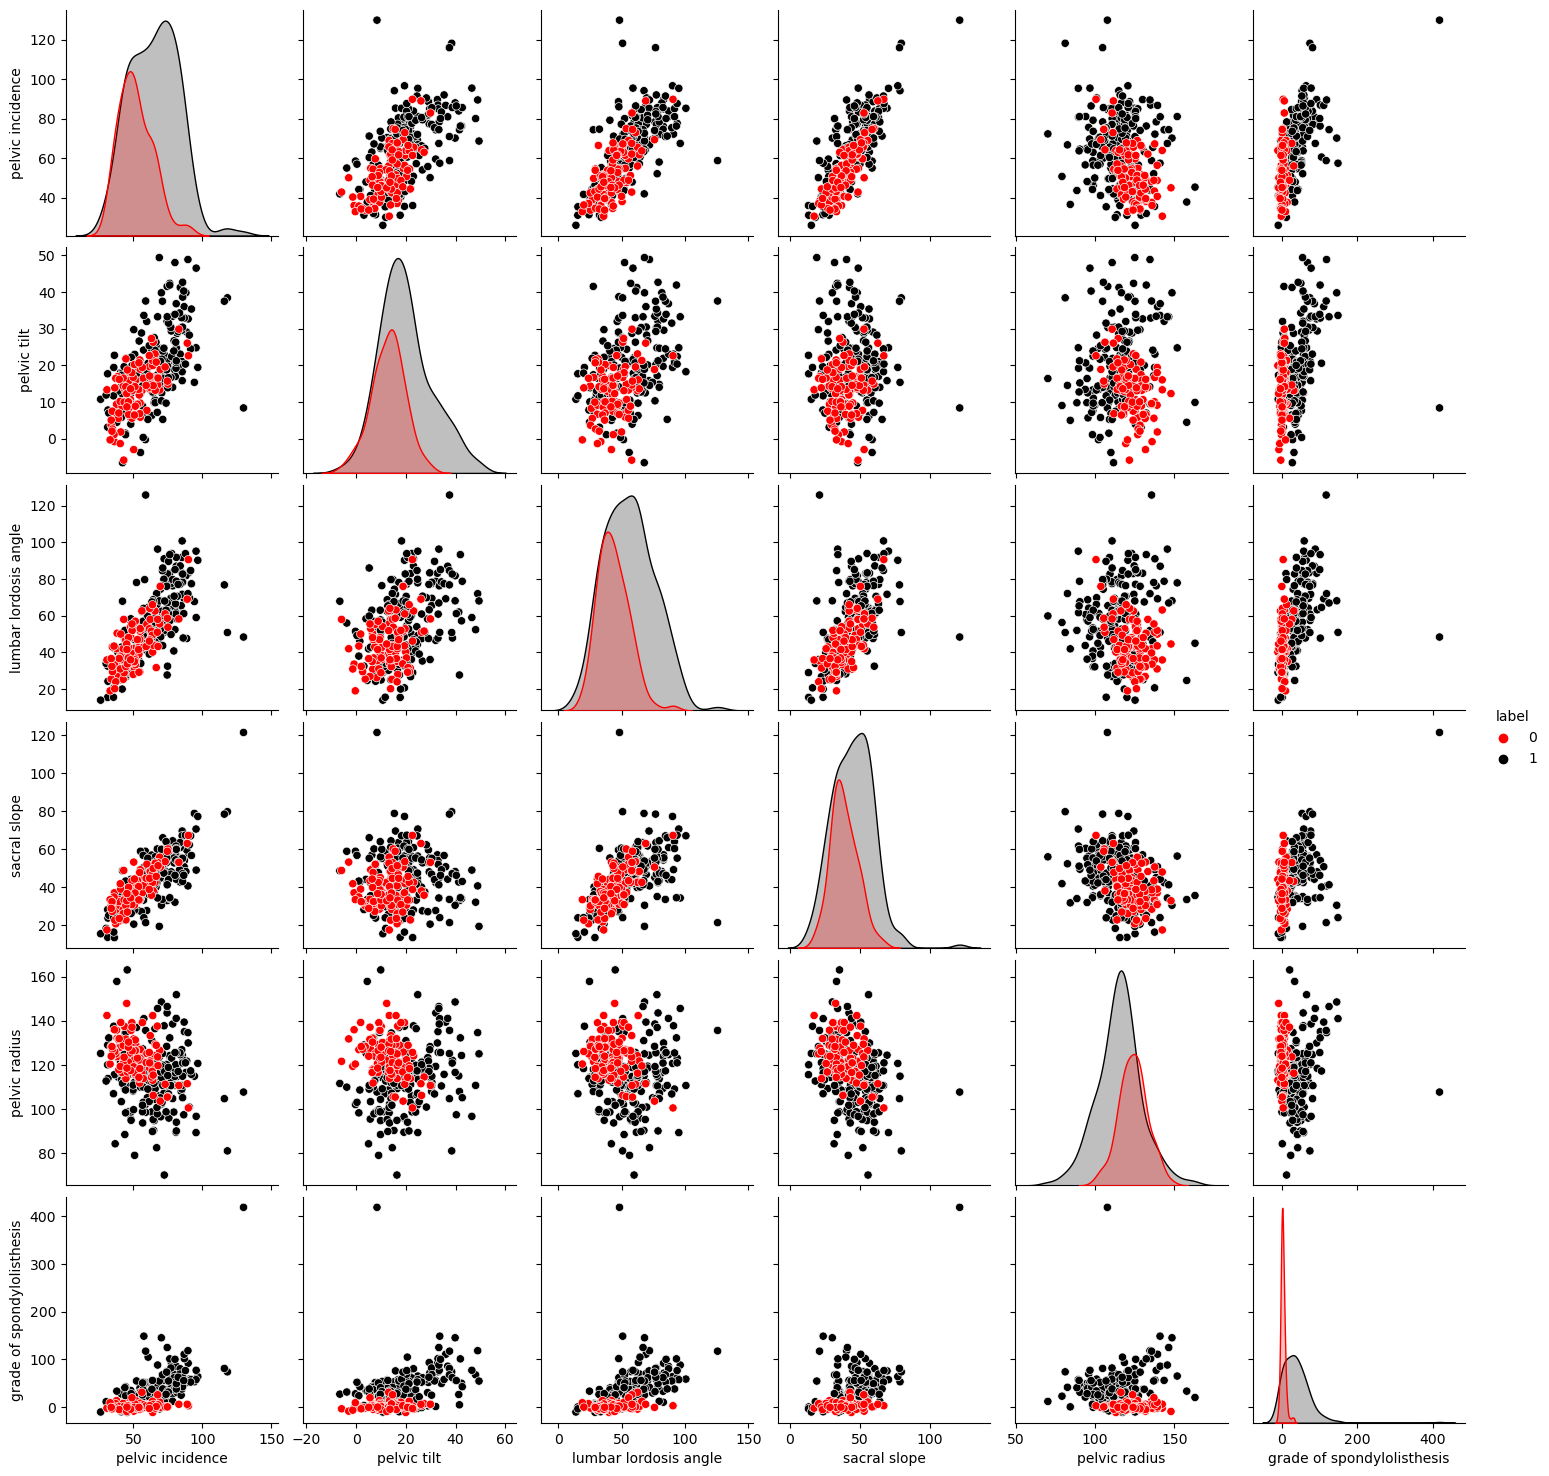

In [2]:
# read data and add header name
df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', names=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'label'], delimiter=' ',)
# change label to 1, 0
df.loc[df['label'] == 'AB', 'label'] = 1
df.loc[df['label'] == 'NO', 'label'] = 0
# print (df)

# use pairplot to create scatterplots
sns.pairplot(df, hue='label', palette={0: 'red', 1: 'black'})

# display the plot and ignore warnings
plt.show()

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

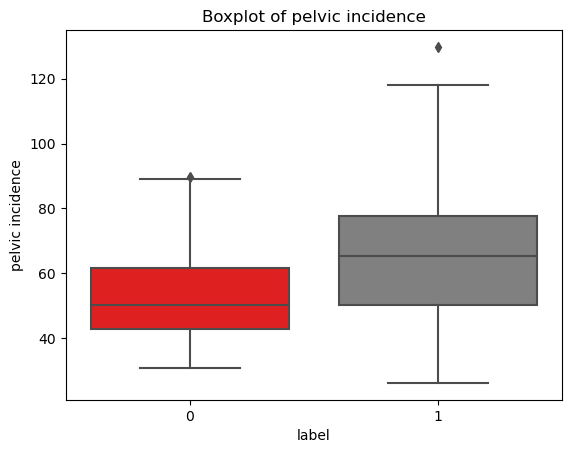

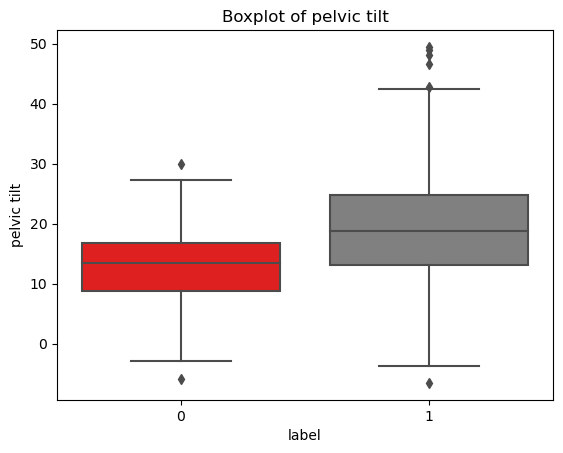

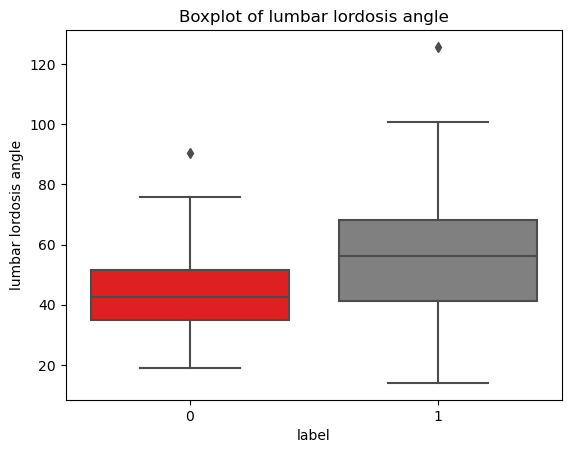

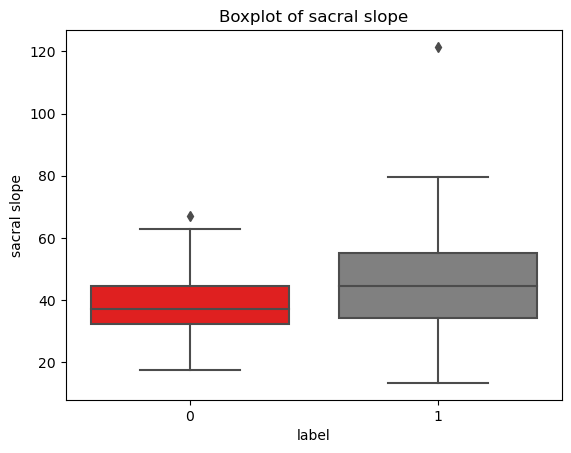

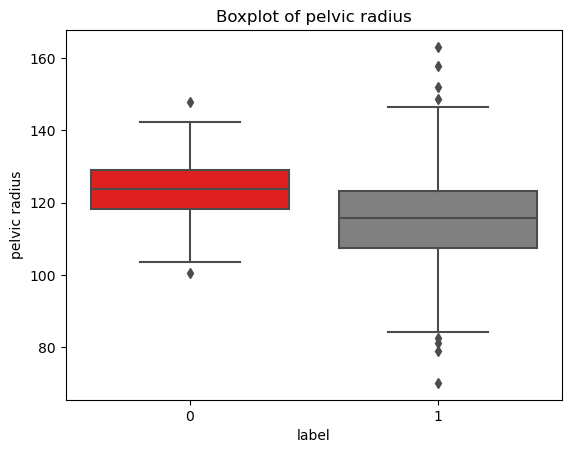

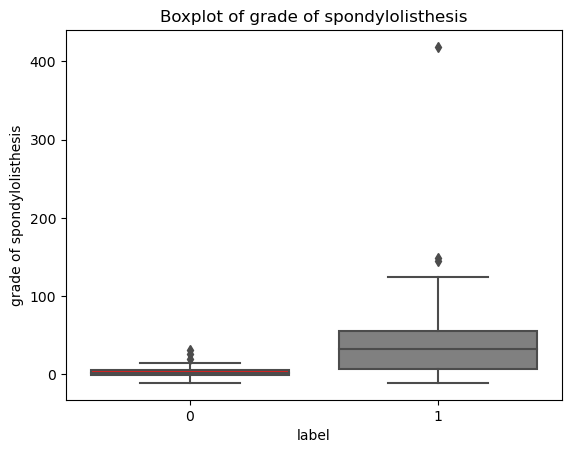

In [3]:
# list of variables
list_vars = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']

# plot boxplots for each variable
for var in list_vars:
    sns.boxplot(x='label', y=var, data=df, palette={0: 'red', 1: 'gray'})
    plt.title(f'Boxplot of {var}')
    plt.show()

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [4]:
# filter to class 0 and 1
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]

# seperate data to training data and testing data
train_class_0 = class_0.iloc[:70]
test_class_0 = class_0.iloc[70:]
train_class_1 = class_1.iloc[:140]
test_class_1 = class_1.iloc[140:]

# combine the training data and test data
training_set = pd.concat([train_class_0, train_class_1])
testing_set = pd.concat([test_class_0, test_class_1])

print("Training set shape:", training_set.shape)
print("Test set shape:", testing_set.shape)

Training set shape: (210, 7)
Test set shape: (100, 7)


### (c) Classification using KNN on Vertebral Column Data Set

In [5]:
train_lowest_errors = {}

#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [6]:
# seperate training data and testing data's label to y
x_train = training_set.drop('label', axis=1)
y_train = training_set['label'].astype('int')
x_test = testing_set.drop('label', axis=1)
y_test = testing_set['label'].astype('int')
# print(x_train, y_train, x_test, y_test)

# initialize KNN classifier and use n_neighbors=5 for example
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# train the data and predict the result
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.00%


#### ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

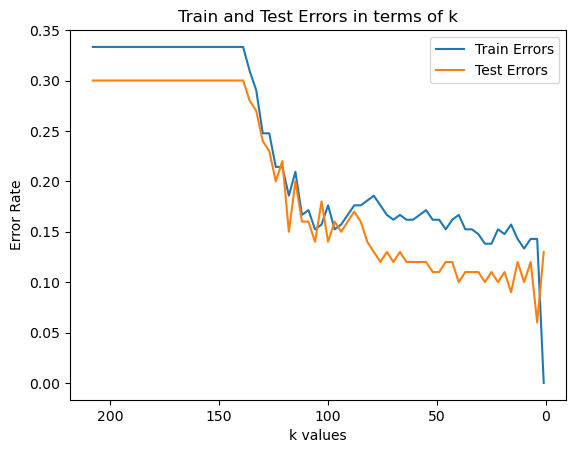

Most suitable k is: 4


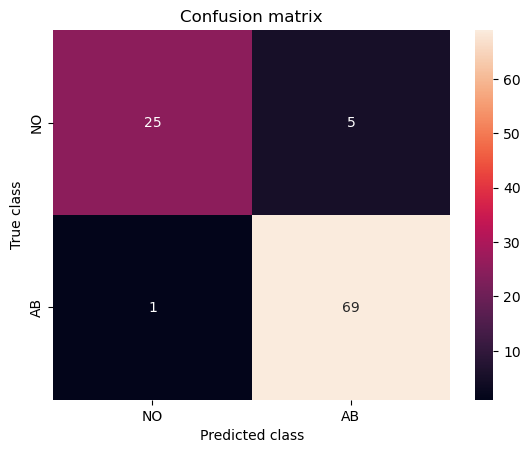

True Positive Rate: 0.985714
True Negative Rate: 0.833333
Precision: 0.932432
F1-score: 0.958333


In [7]:
# use knn in different k
train_errors = []
test_errors = []
k_values = list(range(208, 0, -3))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, knn.predict(x_train)))
    test_errors.append(1 - accuracy_score(y_test, knn.predict(x_test)))

train_lowest_errors['Euclidean distance by majority voting'] = min(train_errors)
    
# plot the errors
plt.plot(k_values, train_errors, label='Train Errors')
plt.plot(k_values, test_errors, label='Test Errors')
plt.xlabel('k values')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors in terms of k')
plt.legend()
# in reverse order
plt.gca().invert_xaxis()
plt.show()

# most suitable k
best_k = k_values[np.argmin(test_errors)]
min_error_euclidean = min(test_errors)
print(f"Most suitable k is: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# plot the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, xticklabels=["NO", "AB"], yticklabels=["NO", "AB"], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# calculate all the score
TPR = confusion[1,1] / (confusion[1,1] + confusion[1,0])
TNR = confusion[0,0] / (confusion[0,0] + confusion[0,1])
precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
print(f"True Positive Rate: {TPR:4f}")
print(f"True Negative Rate: {TNR:4f}")
print(f"Precision: {precision:4f}")
print(f"F1-score: {F1:4f}")

#### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

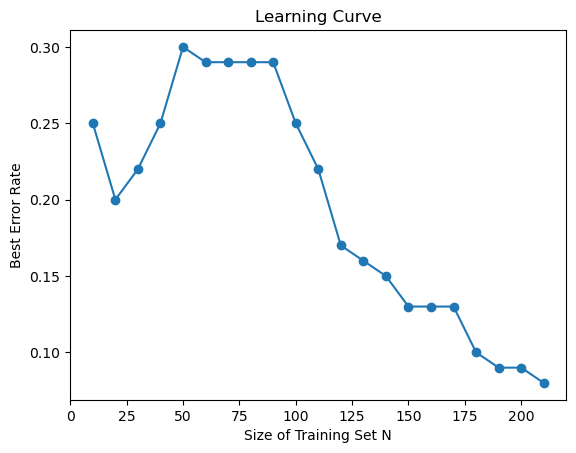

In [8]:
N_values = list(range(10, 211, 10))
min_errors = []

for N in N_values:
    # create subset of the training data
    train_subset = pd.concat([train_class_0.iloc[:(int(N/3))], train_class_1.iloc[:(N - (int(N/3)))]])
    x_train_subset = train_subset.drop('label', axis=1)
    y_train_subset = train_subset['label'].astype('int')
    subset_errors = []
    
    # use different k to train data
    k_values = range(1, N, 5)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(x_train_subset, y_train_subset)
        subset_errors.append(1 - accuracy_score(y_test, knn.predict(x_test)))
    
    min_errors.append(min(subset_errors))

# plot the learning curve
plt.plot(N_values, min_errors, marker='o')
plt.xlabel('Size of Training Set N')
plt.ylabel('Best Error Rate')
plt.title('Learning Curve')
plt.show()

### (d) Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

#### i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.

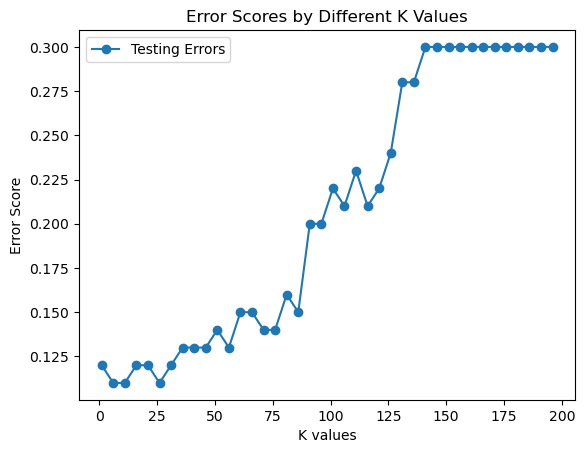

In [9]:
k_values = list(range(1, 197, 5))
test_errors = {}

errors = []
train_errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(x_train, y_train)
    errors.append(1 - knn.score(x_test, y_test))
    train_errors.append(1 - knn.score(x_train, y_train))
    
train_lowest_errors['Minkowski distance by majority voting'] = min(train_errors)
    
# plot the testing errors
plt.plot(k_values, errors, label='Testing Errors', marker='o')
plt.xlabel('K values')
plt.ylabel('Error Score')
plt.legend()
plt.title('Error Scores by Different K Values')
plt.show()
    
best_k_manhattan = k_values[np.argmin(errors)]
min_error_manhattan = min(errors)

B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

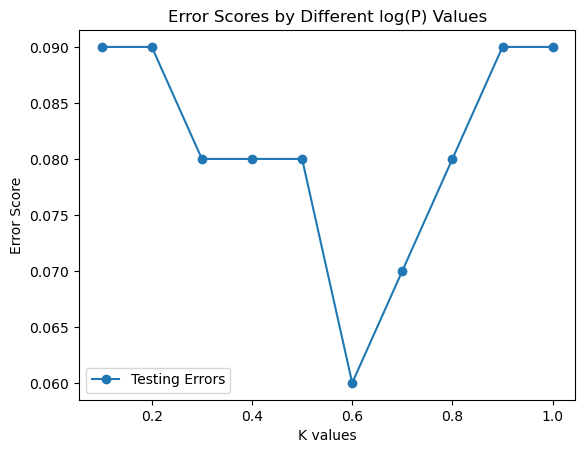

In [10]:
log_p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errors = []
for log_p in log_p_values:
    p = pow(10, log_p)
    knn = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='minkowski', p=p)
    knn.fit(x_train, y_train)
    errors.append(1 - knn.score(x_test, y_test))
    
# plot the testing errors
plt.plot(log_p_values, errors, label='Testing Errors', marker='o')
plt.xlabel('K values')
plt.ylabel('Error Score')
plt.legend()
plt.title('Error Scores by Different log(P) Values')
plt.show()
    
best_log_p = log_p_values[np.argmin(errors)]
min_error_manhattan_log = min(errors)

C. which becomes Chebyshev Distance with p → ∞

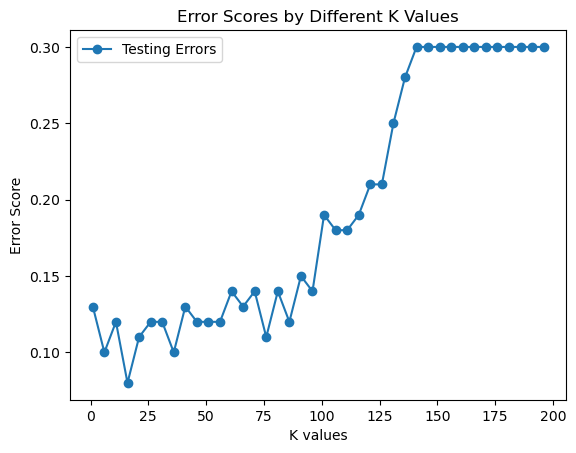

In [11]:
errors = []
train_errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', p=float('inf'))
    knn.fit(x_train, y_train)
    errors.append(1 - knn.score(x_test, y_test))
    train_errors.append(1 - knn.score(x_train, y_train))
    
train_lowest_errors['Chebyshev distance by majority voting'] = min(train_errors)
    
# plot the testing errors
plt.plot(k_values, errors, label='Testing Errors', marker='o')
plt.xlabel('K values')
plt.ylabel('Error Score')
plt.legend()
plt.title('Error Scores by Different K Values')
plt.show()
    
best_k_chebyshev = k_values[np.argmin(errors)]
min_error_chebyshev = min(errors)

#### ii. Mahalanobis Distance.

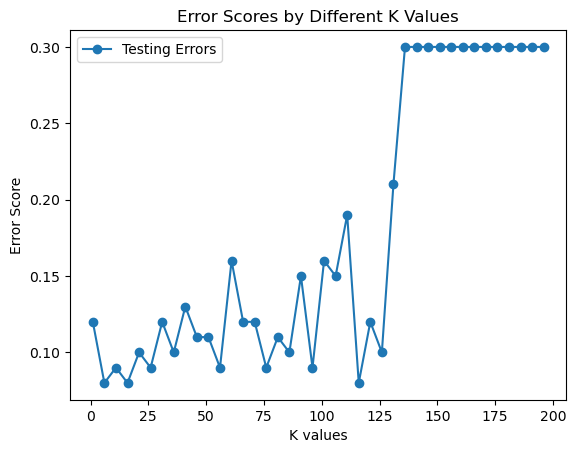

,Distance metric,Test error,k value
0,Euclidean,0.06,4
1,Manhattan,0.11,6
2,Manhattan (logP),0.06,6
3,Chebyshev,0.08,16
4,Mahalanobis,0.08,6


In [12]:
errors = []
train_errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.cov(x_train, rowvar=False)})
    knn.fit(x_train, y_train)
    errors.append(1 - knn.score(x_test, y_test))
    train_errors.append(1 - knn.score(x_train, y_train))
    
train_lowest_errors['Mahalanobis distance by majority voting'] = min(train_errors)

best_k__mahalanobis = k_values[np.argmin(errors)]
min_error_mahalanobis = min(errors)

# plot the testing errors
plt.plot(k_values, errors, label='Testing Errors', marker='o')
plt.xlabel('K values')
plt.ylabel('Error Score')
plt.legend()
plt.title('Error Scores by Different K Values')
plt.show()

# show the table of each metric's test errors and k
table_data = {'Distance metric':  ['Euclidean', 'Manhattan', 'Manhattan (logP)', 'Chebyshev', 'Mahalanobis'],
        'Test error': [min_error_euclidean, min_error_manhattan, min_error_manhattan_log, min_error_chebyshev, min_error_mahalanobis],
        'k value': [best_k, best_k_manhattan, best_k_manhattan, best_k_chebyshev, best_k__mahalanobis]}

test_error_table = pd.DataFrame(table_data)
test_error_table

### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [13]:
k_values = list(range(1, 197, 5))
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
test_errors = {}

# for each metric, store the min test error and the best k value
for metric in distance_metrics:
    errors = []
    train_errors = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
        train_errors.append(1 - knn.score(x_train, y_train))
    
    train_lowest_errors[metric + ' distance by wighted decision'] = min(train_errors)
    
    best_k = k_values[np.argmin(errors)]
    test_errors[metric] = (min(errors), best_k)

# show the results in a table
result_table = pd.DataFrame({
    'Metric': list(test_errors.keys()),
    'Test error': [val[0] for val in test_errors.values()],
    'k value': [val[1] for val in test_errors.values()]})
result_table

,Metric,Test error,k value
0,euclidean,0.10,6
1,manhattan,0.10,26
2,chebyshev,0.11,16


### (f) What is the lowest training error rate you achieved in this homework?

In [14]:
train_error_table = pd.DataFrame({
    'Algorithm': list(train_lowest_errors.keys()),
    'Lowest training error rate': list(train_lowest_errors.values())})
train_error_table

,Algorithm,Lowest training error rate
0,Euclidean distance by majority voting,0.0
1,Minkowski distance by majority voting,0.0
2,Chebyshev distance by majority voting,0.0
3,Mahalanobis distance by majority voting,0.0
4,euclidean distance by wighted decision,0.0
5,manhattan distance by wighted decision,0.0
6,chebyshev distance by wighted decision,0.0
